### ✅ GridSearchCV Results

- Fitting 5 folds for each of *324* candidates, totalling *1620* fits  
- **Best settings**:  
  - `lgbm__colsample_bytree`: 1.0  
  - `lgbm__learning_rate`: 0.01  
  - `lgbm__max_depth`: 10  
  - `lgbm__n_estimators`: 100  
  - `lgbm__num_leaves`: 100  
  - `lgbm__subsample`: 0.8  

- **The best R²**: **-0.0302**

⚠️ R² turned out **worse than before** (negative value means the model performs worse than a simple mean predictor).



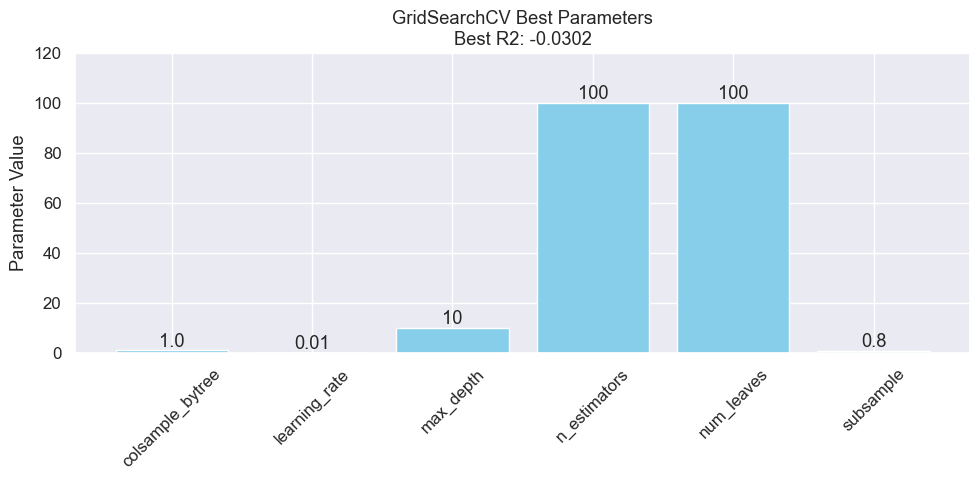

In [ ]:
import matplotlib.pyplot as plt


best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.01,
    'max_depth': 10,
    'n_estimators': 100,
    'num_leaves': 100,
    'subsample': 0.8
}
best_r2 = -0.0302


plt.figure(figsize=(10, 5))

param_names = list(best_params.keys())
param_values = list(best_params.values())

bars = plt.bar(param_names, param_values, color='skyblue')
plt.title(f'GridSearchCV Best Parameters\nBest R2: {best_r2:.4f}')
plt.ylabel('Parameter Value')


for bar, val in zip(bars, param_values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val}', ha='center', va='bottom')

plt.ylim(0, max(param_values)*1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import numpy as np

# --- Data Preparation ---
df['Potability_log'] = np.log1p(df['Potability'])
target = 'Potability_log'
X = df.drop(columns=['Potability', 'Potability_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (R2 but on original scale) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameters grid (LightGBM specific) ---
param_grid = {
    'lgbm__n_estimators': [100, 300, 500],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__num_leaves': [31, 50, 100],
    'lgbm__max_depth': [-1, 10, 20],
    'lgbm__subsample': [0.8, 1.0],
    'lgbm__colsample_bytree': [0.8, 1.0]
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# --- Results ---
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"GridSearchCV best R2: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 9
[LightGBM] [Info] Start training from score 0.270404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

### ✅ RandomizedSearchCV Results

- 30 candidates were tested with 5-fold CV, totalling **150 fits**.  
- **Best settings**:  
  - `lgbm__colsample_bytree`: 0.6624  
  - `lgbm__learning_rate`: 0.0216  
  - `lgbm__max_depth`: 19  
  - `lgbm__n_estimators`: 149  
  - `lgbm__num_leaves`: 123  
  - `lgbm__subsample`: 0.8832  

- **Best R²**: **-0.0487**

⚠️ R² turned out **worse than the previous result** (negative value → model underperforms compared to a simple mean predictor).


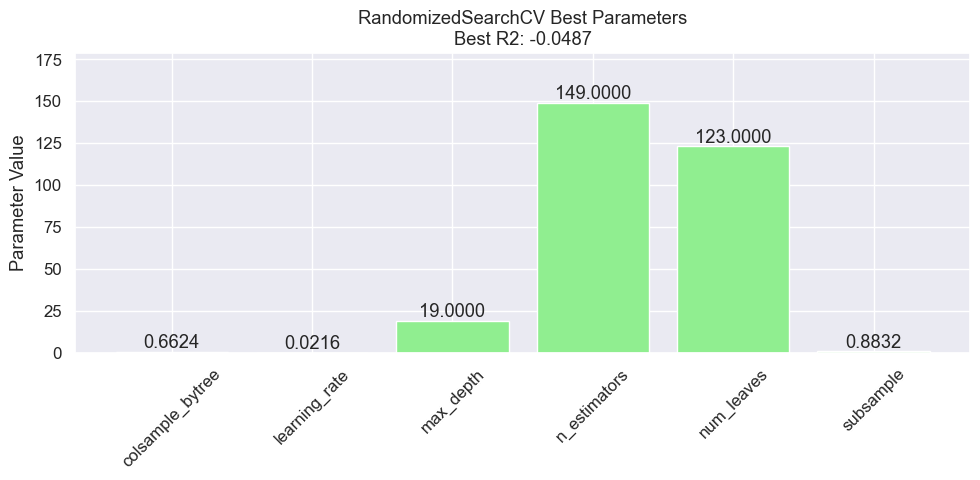

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# --- Best parameters and R2 ---
best_params = {
    'colsample_bytree': 0.6624,
    'learning_rate': 0.0216,
    'max_depth': 19,
    'n_estimators': 149,
    'num_leaves': 123,
    'subsample': 0.8832
}
best_r2 = -0.0487

# --- Bar plot for parameters ---
plt.figure(figsize=(10, 5))

param_names = list(best_params.keys())
param_values = list(best_params.values())

bars = plt.bar(param_names, param_values, color='lightgreen')
plt.title(f'RandomizedSearchCV Best Parameters\nBest R2: {best_r2:.4f}')
plt.ylabel('Parameter Value')

# Parametr ustida qiymat yozish
for bar, val in zip(bars, param_values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(0, max(param_values)*1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import numpy as np

# --- Data Preparation ---
df['Potability_log'] = np.log1p(df['Potability'])
target = 'Potability_log'
X = df.drop(columns=['Potability', 'Potability_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (R2 on original scale) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameter distributions for LightGBM ---
param_dist = {
    'lgbm__n_estimators': randint(50, 500),
    'lgbm__learning_rate': uniform(0.01, 0.2),   # continuous 0.01–0.21
    'lgbm__num_leaves': randint(20, 150),
    'lgbm__max_depth': randint(-1, 20),
    'lgbm__subsample': uniform(0.6, 0.4),        # 0.6–1.0
    'lgbm__colsample_bytree': uniform(0.6, 0.4)  # 0.6–1.0
}

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X, y)

# --- Results ---
print("RandomizedSearchCV best parameters:", random_search.best_params_)
print(f"RandomizedSearchCV best R2: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 9
[LightGBM] [Info] Start training from score 0.270404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


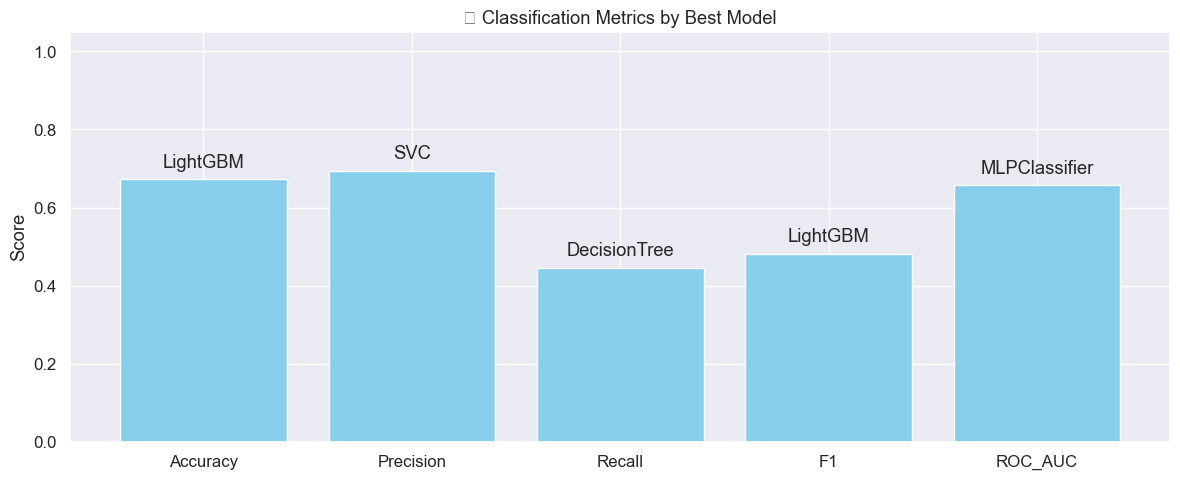

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


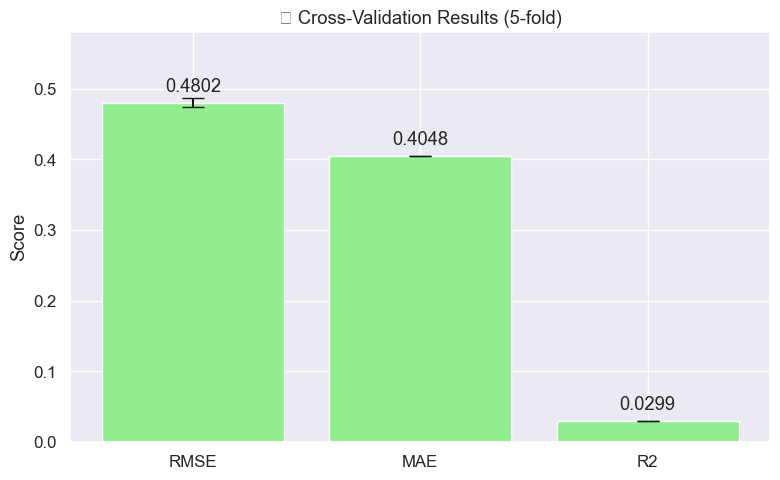

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:71: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


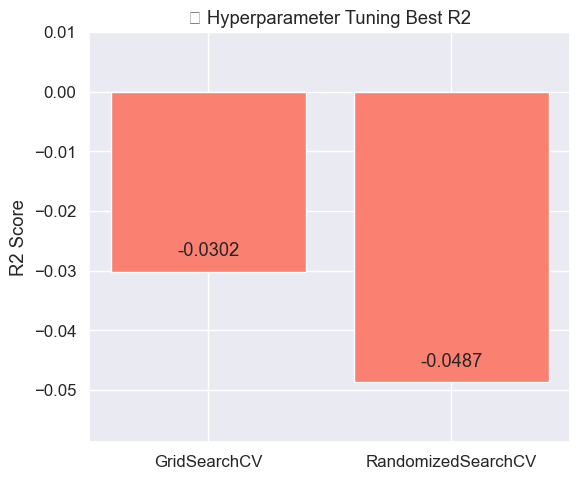

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Classification metrics ---
clf_metrics = {
    'Accuracy': ('LightGBM', 0.6723),
    'Precision': ('SVC', 0.6939),
    'Recall': ('DecisionTree', 0.4453),
    'F1': ('LightGBM', 0.4819),
    'ROC_AUC': ('MLPClassifier', 0.6573)
}

plt.figure(figsize=(12, 5))
names = list(clf_metrics.keys())
scores = [v[1] for v in clf_metrics.values()]
models = [v[0] for v in clf_metrics.values()]

bars = plt.bar(names, scores, color='skyblue')
plt.title('✅ Classification Metrics by Best Model')
plt.ylabel('Score')
plt.ylim(0, 1.05)

# Display model name above the bar
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, model, ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- 2. Cross-validation metrics ---
cv_metrics = {
    'RMSE': 0.4802,
    'MAE': 0.4048,
    'R2': 0.0299
}
cv_std = {
    'RMSE': 0.0068,
    'MAE': 0.0,
    'R2': 0.0
}

plt.figure(figsize=(8, 5))
bars = plt.bar(cv_metrics.keys(), cv_metrics.values(), yerr=list(cv_std.values()), capsize=8, color='lightgreen')
plt.title('📊 Cross-Validation Results (5-fold)')
plt.ylabel('Score')

# Display values above the bars
for bar, val in zip(bars, cv_metrics.values()):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(0, max(cv_metrics.values()) + 0.1)
plt.tight_layout()
plt.show()

# --- 3. GridSearchCV & RandomizedSearchCV best R2 ---
search_results = {
    'GridSearchCV': -0.0302,
    'RandomizedSearchCV': -0.0487
}

plt.figure(figsize=(6, 5))
bars = plt.bar(search_results.keys(), search_results.values(), color='salmon')
plt.title('🔧 Hyperparameter Tuning Best R2')
plt.ylabel('R2 Score')

# Display values above the bars
for bar, val in zip(bars, search_results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.002, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(min(search_results.values())-0.01, 0.01)
plt.tight_layout()
plt.show()
